In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.set_printoptions(linewidth=120)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from IPython.display import display

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

[Download Data From Zenodo](https://zenodo.org/record/4739053/files/edata.csv?download=1)

In [2]:
data = np.loadtxt('./data/edata.csv',delimiter=',')

In [3]:
x = data[:,0:40]
y = data[:,40:44]
numitems = x.shape[0]


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_test, x_validate, y_test, y_validate = train_test_split(x_test, y_test, test_size=0.5)

In [5]:
epochs = 40
batch_size=1000
model = keras.Sequential(
[  
    layers.Dense(160,activation='sigmoid'),
    layers.Dropout(.1),
    layers.Dense(80,activation='sigmoid'),
    layers.Dropout(.1),
    layers.Dense(40,activation='sigmoid'),
    layers.Dropout(.1),
    layers.Dense(4,activation='linear')
])
model.compile(loss='mean_squared_error', optimizer='adam')

In [6]:
training = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(x_test,y_test))
model.save('./model1/')

Epoch 1/40
1677/1677 [==============================] - 25s 13ms/step - loss: 0.0796 - val_loss: 0.0044
Epoch 2/40
1677/1677 [==============================] - 20s 12ms/step - loss: 0.0118 - val_loss: 0.0031
Epoch 3/40
1677/1677 [==============================] - 21s 12ms/step - loss: 0.0085 - val_loss: 0.0026
Epoch 4/40
1677/1677 [==============================] - 21s 12ms/step - loss: 0.0071 - val_loss: 0.0022
Epoch 5/40
1677/1677 [==============================] - 20s 12ms/step - loss: 0.0064 - val_loss: 0.0018
Epoch 6/40
1677/1677 [==============================] - 20s 12ms/step - loss: 0.0058 - val_loss: 0.0016
Epoch 7/40
1677/1677 [==============================] - 20s 12ms/step - loss: 0.0055 - val_loss: 0.0015
Epoch 8/40
1677/1677 [==============================] - 21s 12ms/step - loss: 0.0053 - val_loss: 0.0013
Epoch 9/40
1677/1677 [==============================] - 21s 12ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 10/40
1677/1677 [==============================] - 21s 12m

In [8]:
predict_valid = model(x_validate)
dif = predict_valid - y_validate
dif_mod = dif/y_validate

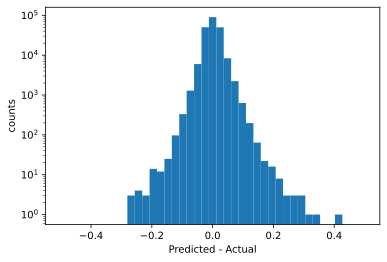

In [36]:
counts, bins = np.histogram(dif[:,0],range=(-0.5,0.5),bins=41)
plt.hist(bins[:-1],bins,weights=counts);
plt.yscale('log');
plt.ylabel('counts');
plt.xlabel('Predicted - Actual');

Text(0.5, 0, '(Predicted - Actual)/actual')

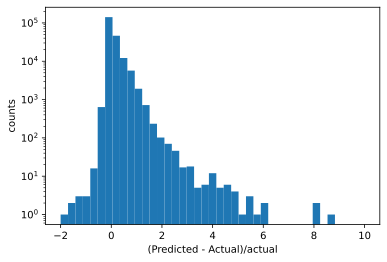

In [18]:
counts, bins = np.histogram(dif_mod[:,0],range=(-2,10),bins=41)
plt.hist(bins[:-1],bins,weights=counts);
plt.yscale('log');
plt.ylabel('counts')
plt.xlabel('(Predicted - Actual)/actual')

0.024247248


Text(0.5, 0, 'Greens Function')

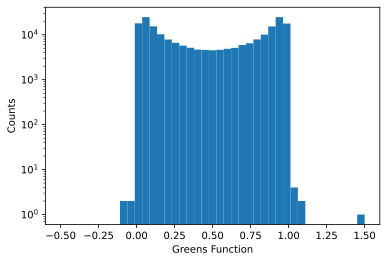

In [30]:
std = np.std(dif)
print(std)
counts, bins = np.histogram(y_validate[:,0],range=(-0.5,1.5),bins=41)
plt.hist(bins[:-1],bins,weights=counts);
plt.yscale('log');
plt.ylabel('Counts')
plt.xlabel('Greens Function')

In [11]:
x_train_3d = np.reshape(x_train,(1676192,2,2,10,1))
x_test_3d = np.reshape(x_test,(209524,2,2,10,1))
x_validate_3d = np.reshape(x_validate,(209524,2,2,10,1))

In [12]:
model2 = keras.Sequential(
[  
    layers.Conv3D(4,2,input_shape=(2,2,10,1),activation='sigmoid',padding='valid'),
    layers.Flatten(),
    layers.Dropout(.05),
    layers.Dense(160,activation='sigmoid'),
    layers.Dropout(.1),
    layers.Dense(80,activation='sigmoid'),
    layers.Dropout(.1),
    layers.Dense(40,activation='sigmoid'),
    layers.Dropout(.1),
    layers.Dense(4,activation='linear')
])
model2.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
training2 = model2.fit(x_train_3d,y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(x_test_3d,y_test))
model.save('./model2/')

Epoch 1/40
1677/1677 [==============================] - 35s 20ms/step - loss: 0.1173 - val_loss: 0.0191
Epoch 2/40
1677/1677 [==============================] - 33s 20ms/step - loss: 0.0219 - val_loss: 0.0060
Epoch 3/40
1677/1677 [==============================] - 33s 20ms/step - loss: 0.0145 - val_loss: 0.0050
Epoch 4/40
1677/1677 [==============================] - 33s 20ms/step - loss: 0.0129 - val_loss: 0.0045
Epoch 5/40
1677/1677 [==============================] - 34s 20ms/step - loss: 0.0119 - val_loss: 0.0043
Epoch 6/40
1677/1677 [==============================] - 34s 20ms/step - loss: 0.0114 - val_loss: 0.0041
Epoch 7/40
1677/1677 [==============================] - 33s 20ms/step - loss: 0.0111 - val_loss: 0.0039
Epoch 8/40
1677/1677 [==============================] - 33s 20ms/step - loss: 0.0108 - val_loss: 0.0038
Epoch 9/40
1677/1677 [==============================] - 34s 20ms/step - loss: 0.0105 - val_loss: 0.0035
Epoch 10/40
1677/1677 [==============================] - 34s 20m

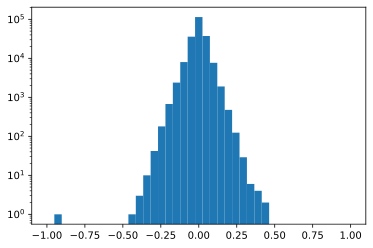

In [29]:
predict2_valid = model2(x_validate_3d)
dif2 = predict2_valid - y_validate
counts, bins = np.histogram(dif2[:,0],range=(-1,1),bins=41)
plt.hist(bins[:-1],bins,weights=counts);
plt.yscale('log');

In [15]:
std2 = np.std(dif2)
print(std2)

0.04525973


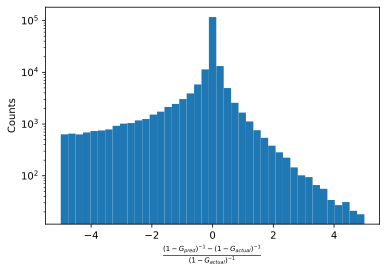

In [44]:
onePreValid = 1/(1 - predict_valid)
oneYValid = 1/(1 - y_validate)
difCorr = (onePreValid-oneYValid)
#/oneYValid
counts, bins = np.histogram(difCorr[:,0],range=(-5,5),bins=41)
plt.hist(bins[:-1],bins,weights=counts);
plt.yscale('log');
plt.ylabel('Counts');
plt.xlabel(r'$\frac{(1-G_{pred})^{-1}-(1-G_{actual})^{-1}}{(1-G_{actual})^{-1}}$');
